## Parte 1: Scaricamento dei dati e visualizzazione dei grafici

## Analisi statistica dei rendimenti

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']
GOOGL:
                   High         Low        Open       Close     Volume  \
Date                                                                    
2011-11-30  300.055054  296.341339  299.274261  299.994995  6787206.0   
2011-12-01  308.308319  299.799805  300.300293  307.192200  7233959.0   
2011-12-02  312.312317  308.438446  308.833832  310.490479  8163229.0   
2011-12-05  316.266266  311.511505  314.134125  313.138153  6388605.0   
2011-12-06  314.624634  310.430420  311.806793  312.197205  4648347.0   

             Adj Close  
Date         

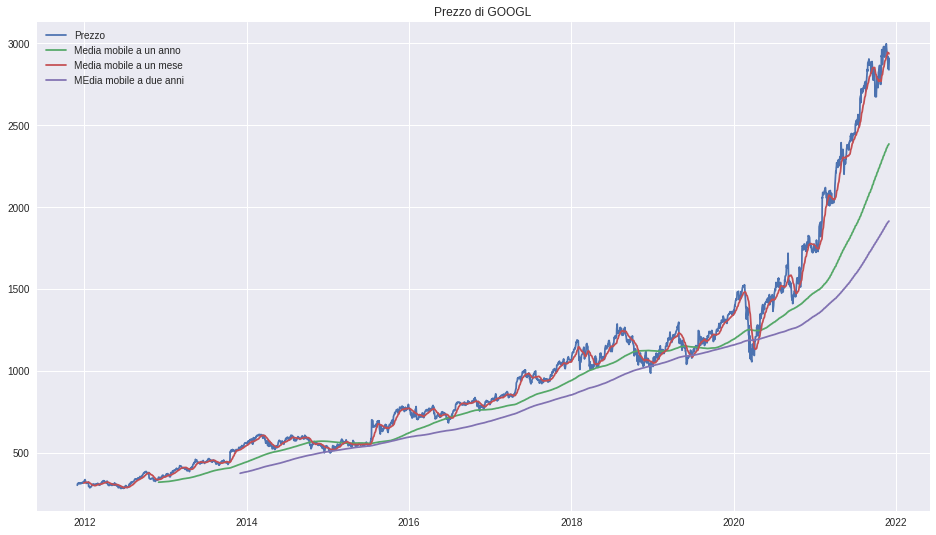

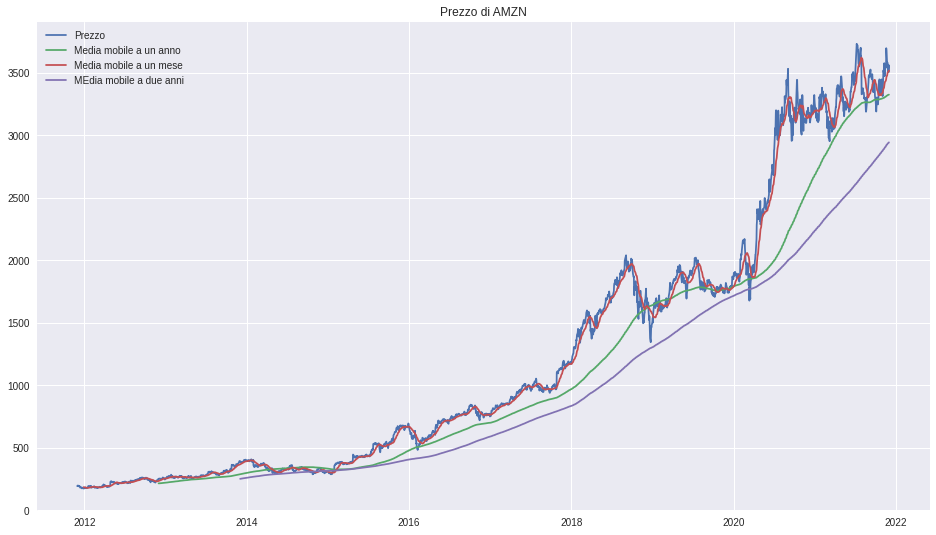

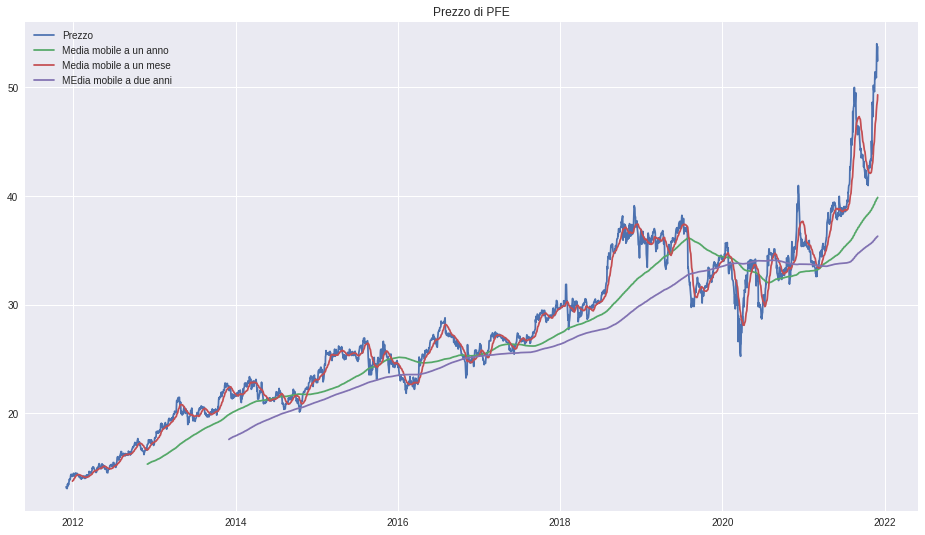

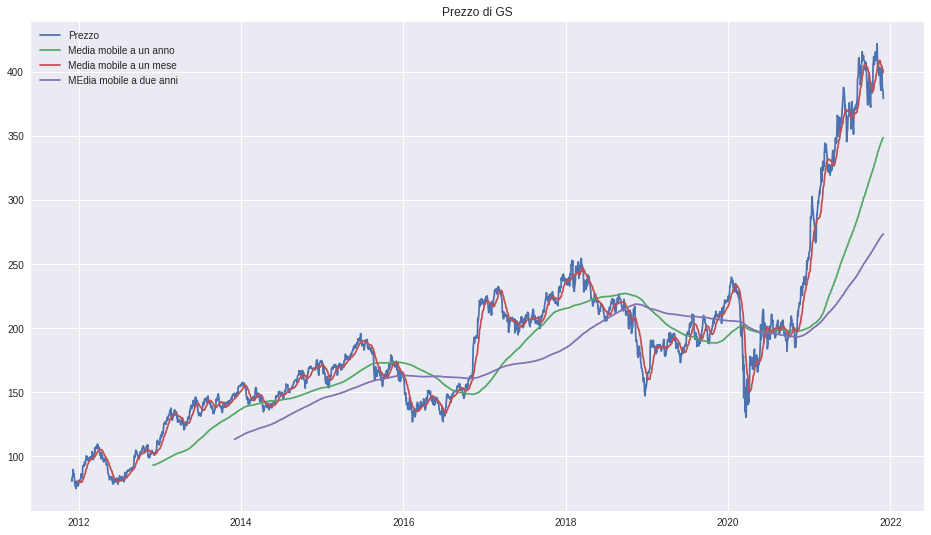

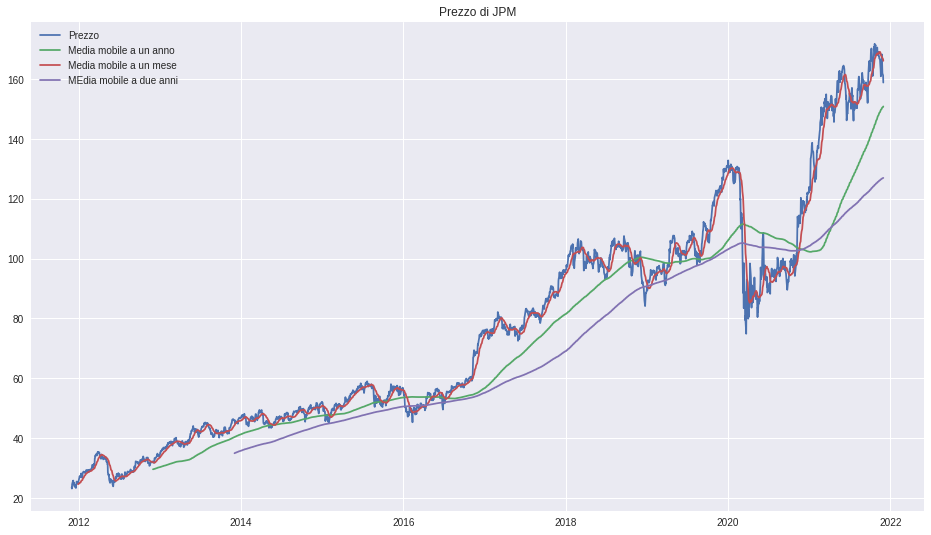

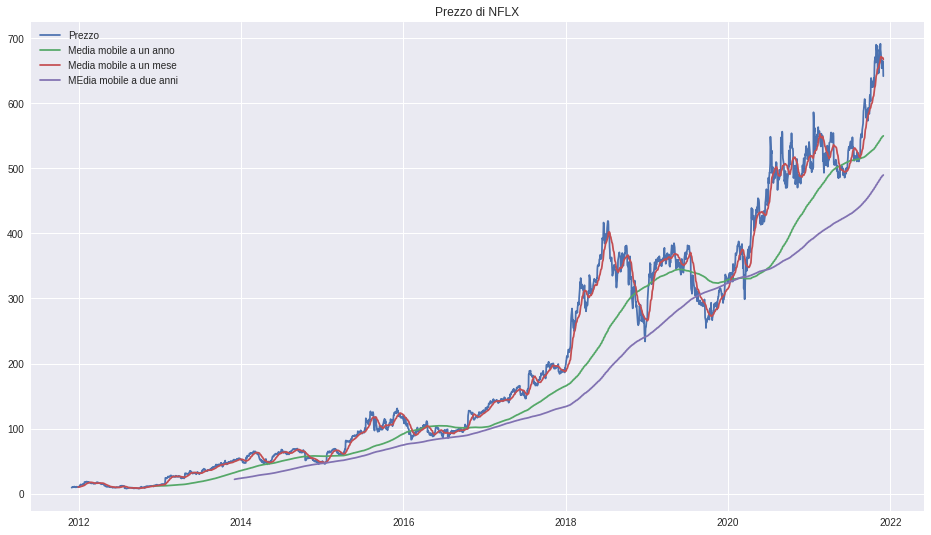

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader as web
print(plt.style.available)
plt.style.use('seaborn')

start_date = '2011-11-30'
end_date = '2021-11-30'

tickers = ['GOOGL', 'AMZN', 'PFE', 'GS', 'JPM', 'NFLX']

datasets = {}
adj_close_df = {}
adj_close_dataset = {}


year_moving_average = 252
month_moving_average = 21
MA5 = 2 * year_moving_average

for ticker in tickers:
    datasets[ticker] = web.get_data_yahoo(ticker, start_date, end_date)
    adj_close_df[ticker] = datasets[ticker]['Adj Close']
    plt.figure(figsize=(16, 9))
    plt.title('Prezzo di ' + ticker)
    plt.grid(True)
    plt.plot(datasets[ticker]['Adj Close'], label = 'Prezzo')
    plt.plot(datasets[ticker]['Adj Close'].rolling(year_moving_average).mean(), label = 'Media mobile a un anno')
    plt.plot(datasets[ticker]['Adj Close'].rolling(month_moving_average).mean(), label = 'Media mobile a un mese')
    plt.plot(datasets[ticker]['Adj Close'].rolling(MA5).mean(), label = 'MEdia mobile a due anni')
    adj_close_dataset[ticker] = datasets[ticker]['Adj Close']
    plt.legend()
    print(ticker + ':\n', datasets[ticker].head(), '\n')

adj_close_df = pd.DataFrame(adj_close_df)

===STATISTICHE UNIVARIATE===

GOOGL:
Media: 0.0010187274815106322
Varianza: 0.0003
Deviazione Stamdard: 0.015865244541315767
Asimmetria: 0.5016007699161901
Curtosi: 11.218451681920437

AMZN:
Media: 0.0013353782070960783
Varianza: 0.0004
Deviazione Stamdard: 0.019073662204878467
Asimmetria: 0.5360097574189885
Curtosi: 8.05155889760218

PFE:
Media: 0.000639132528749336
Varianza: 0.0002
Deviazione Stamdard: 0.012818144915057202
Asimmetria: 0.3441832207389493
Curtosi: 7.71916491545144

GS:
Media: 0.0007651905291109412
Varianza: 0.0003
Deviazione Stamdard: 0.01764262332404242
Asimmetria: 0.13849726102488005
Curtosi: 10.283659459446524

JPM:
Media: 0.0009034739264222109
Varianza: 0.0003
Deviazione Stamdard: 0.016977513221323216
Asimmetria: 0.28046798745187
Curtosi: 14.25692457441678

NFLX:
Media: 0.0021279906186320876
Varianza: 0.0009
Deviazione Stamdard: 0.030063628475125722
Asimmetria: 1.705927999292591
Curtosi: 24.518737441763413

             GOOGL         AMZN          PFE           GS 

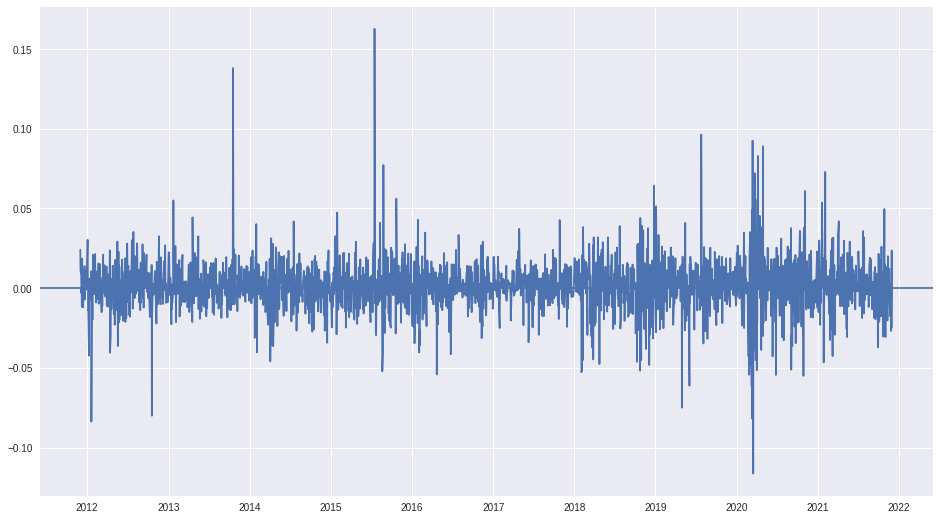

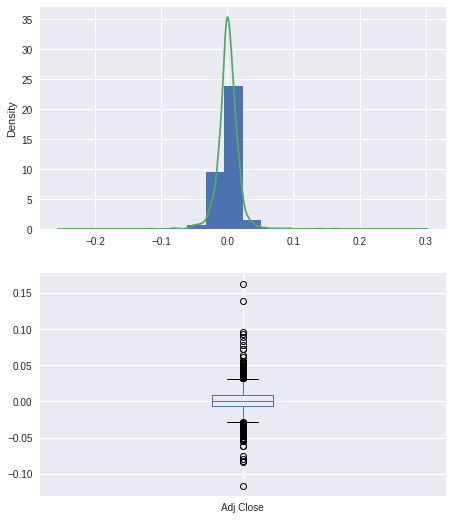

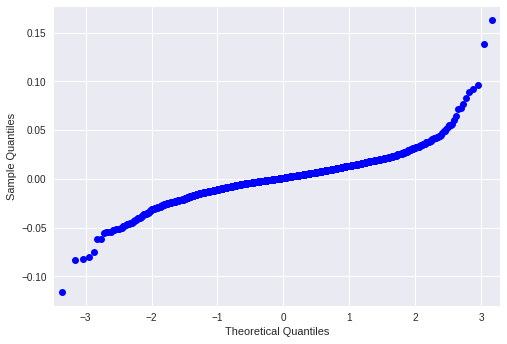

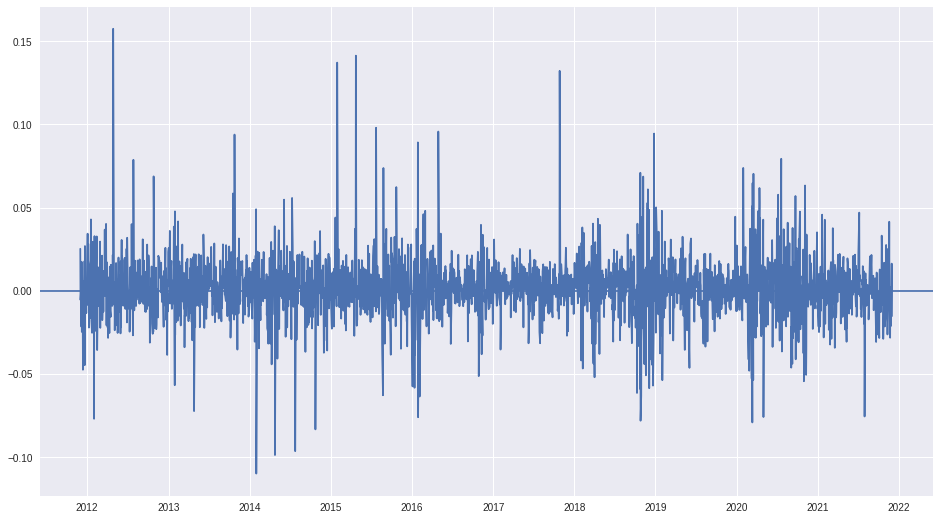

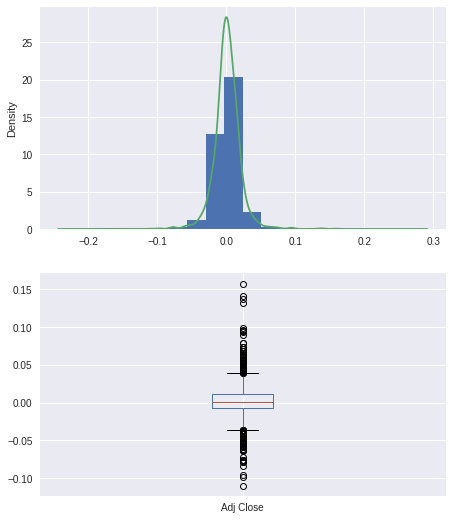

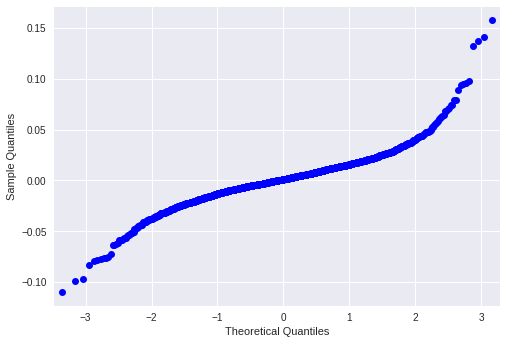

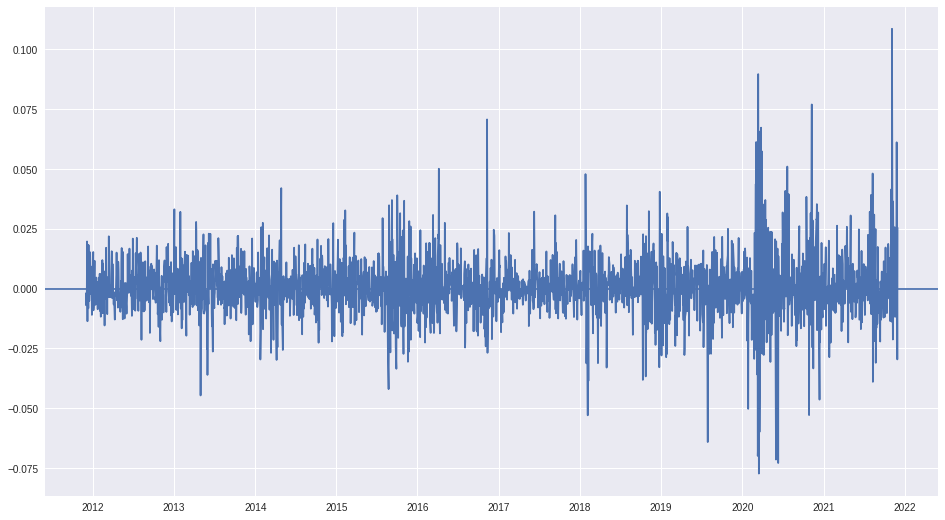

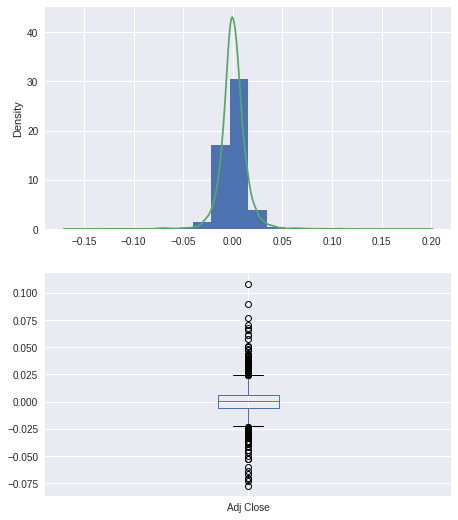

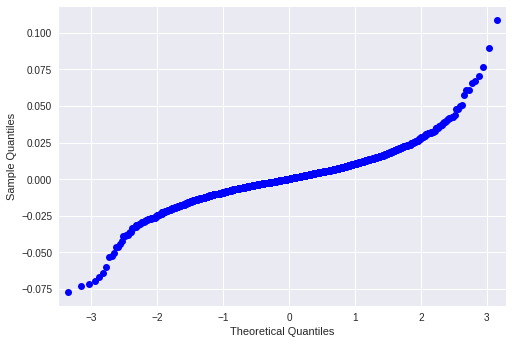

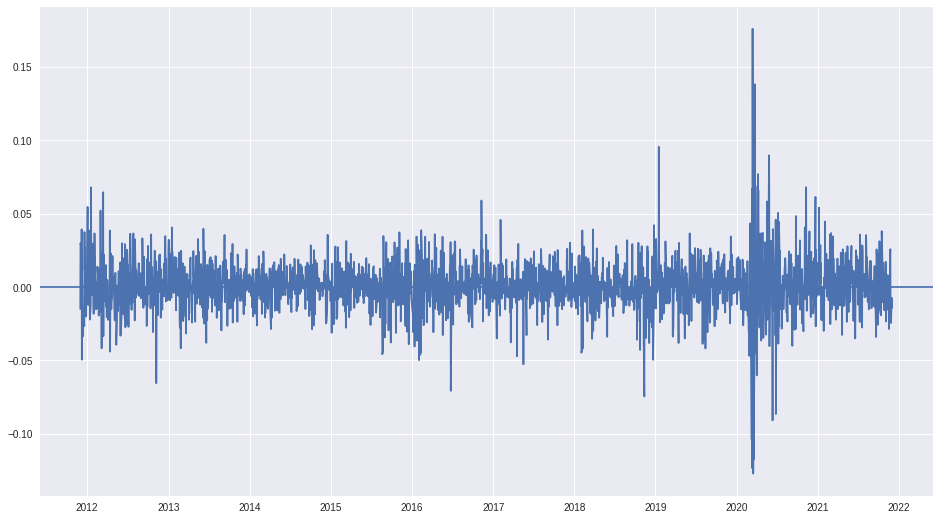

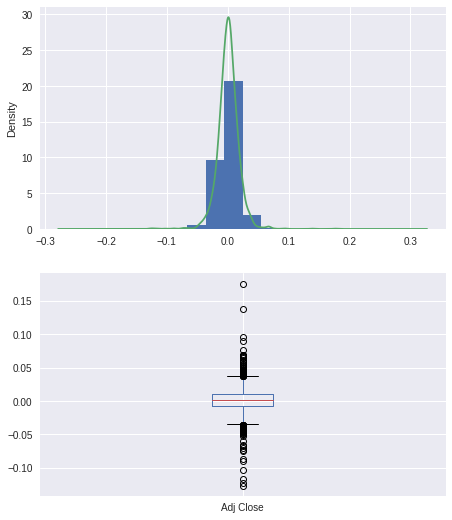

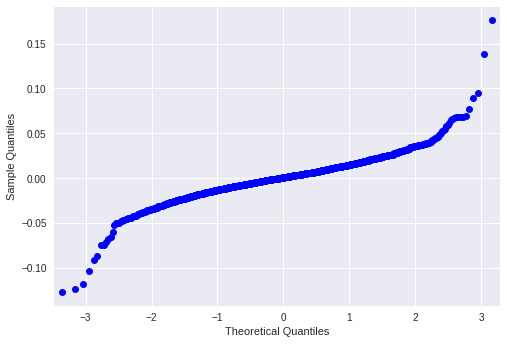

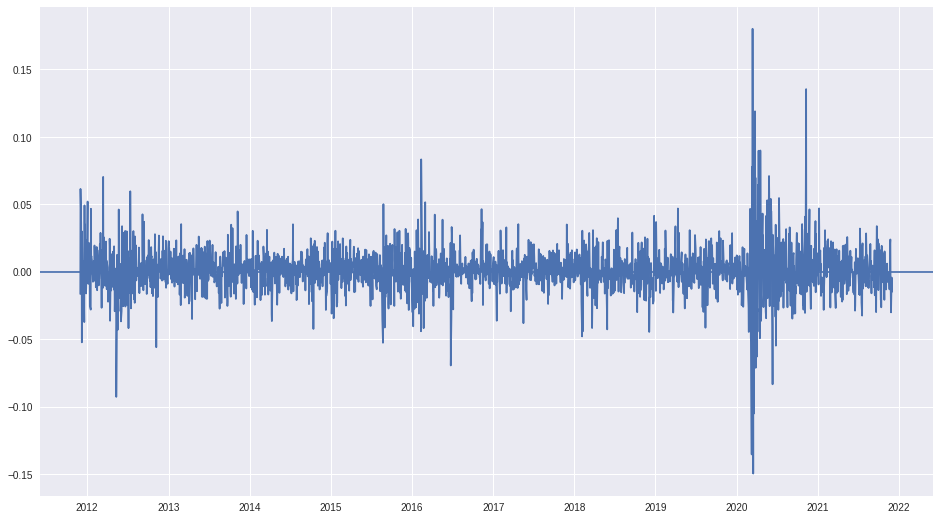

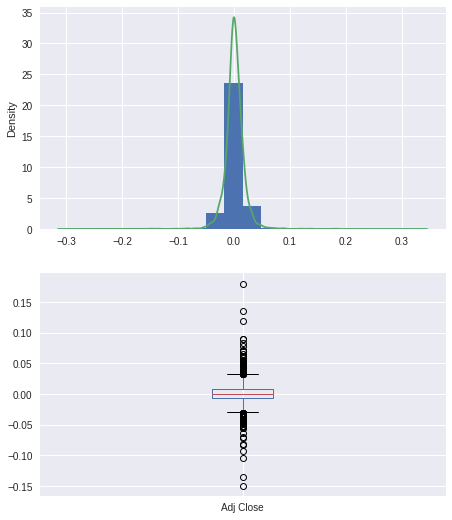

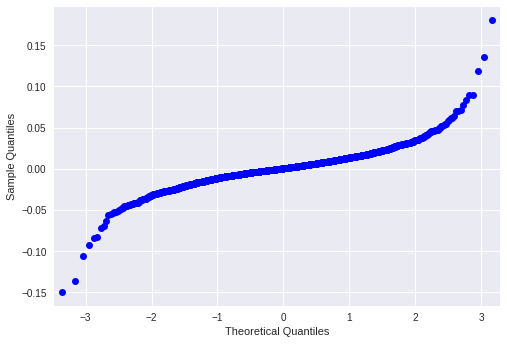

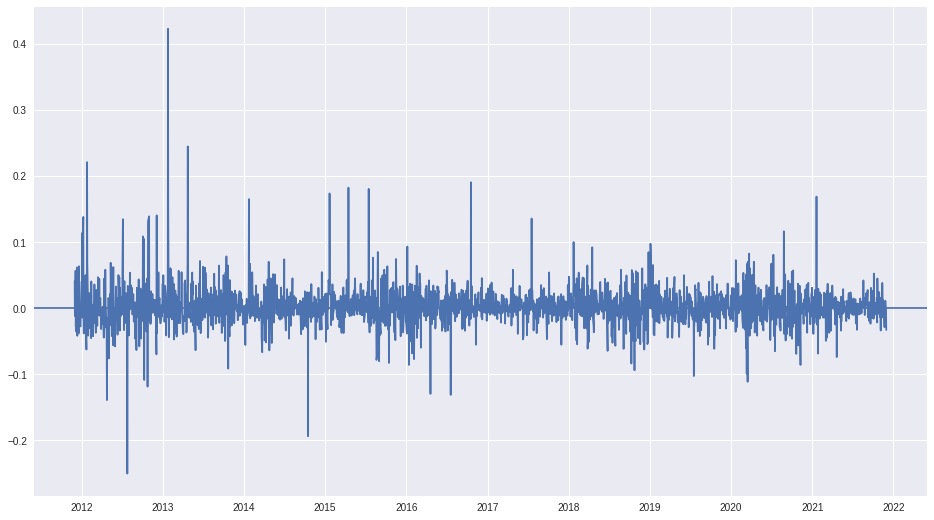

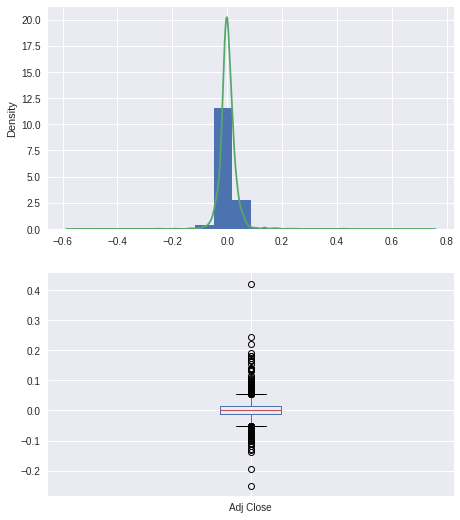

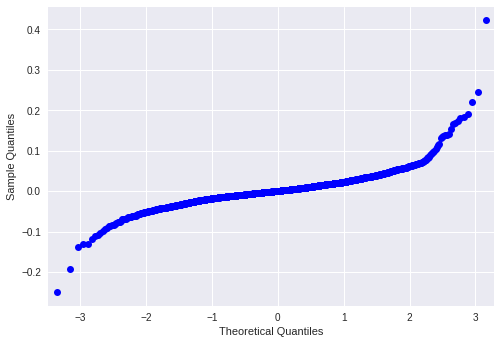

In [120]:
import numpy as np
import statsmodels.api as sm
from scipy.stats import norm

returns = {}
compounded_returns = {}

for ticker in tickers:
    returns[ticker] = datasets[ticker]['Adj Close'] / datasets[ticker]['Adj Close'].shift(1)
    compounded_returns[ticker] = returns[ticker].cumprod()
    plt.figure(figsize=(16, 9))
    returns[ticker] = returns[ticker] - 1
    plt.plot(returns[ticker])
    plt.axhline(0)
    #plt.plot(compounded_returns[ticker])
    plt.figure(figsize=(16, 9))
    plt.subplot(221)
    plt.hist(returns[ticker], density=True)
    returns[ticker].plot.density()
    plt.subplot(223)
    returns[ticker].to_frame().boxplot()
    sm.qqplot(returns[ticker])

returns = pd.DataFrame(returns)
print('===STATISTICHE UNIVARIATE===\n')
for ticker in tickers:
    print(ticker + ':')
    print('Media: ' + str(returns[ticker].mean()))
    std = returns[ticker].std()
    var = returns[ticker].var()
    print('Varianza: ' + str(np.round(std ** 2, 4)))
    print('Deviazione Stamdard: ' + str(std))
    print('Asimmetria: ' + str(returns[ticker].skew()))
    print('Curtosi: ' + str(returns[ticker].kurtosis()) + '\n')


print(returns.describe())
print(np.round(returns.cov(), 4))
print(np.round(returns.corr(), 4))

## Previsione con rete neurale

Epoch 1/20
147/147 [==============================] - 1s 5ms/step - loss: 2885.2361 - val_loss: 236.6369
Epoch 2/20
147/147 [==============================] - 1s 3ms/step - loss: 10.2000 - val_loss: 237.4847
Epoch 3/20
147/147 [==============================] - 0s 3ms/step - loss: 10.2213 - val_loss: 237.4085
Epoch 4/20
147/147 [==============================] - 0s 3ms/step - loss: 10.2162 - val_loss: 246.5464
Epoch 5/20
147/147 [==============================] - 0s 3ms/step - loss: 10.2929 - val_loss: 232.5175
Epoch 6/20
147/147 [==============================] - 0s 3ms/step - loss: 10.2913 - val_loss: 248.2055
Epoch 7/20
147/147 [==============================] - 0s 3ms/step - loss: 10.2490 - val_loss: 235.7491
Epoch 8/20
147/147 [==============================] - 0s 3ms/step - loss: 10.2610 - val_loss: 231.6807
Epoch 9/20
147/147 [==============================] - 0s 3ms/step - loss: 10.2790 - val_loss: 236.9560
Epoch 10/20
147/147 [==============================] - 0s 3ms/step - lo

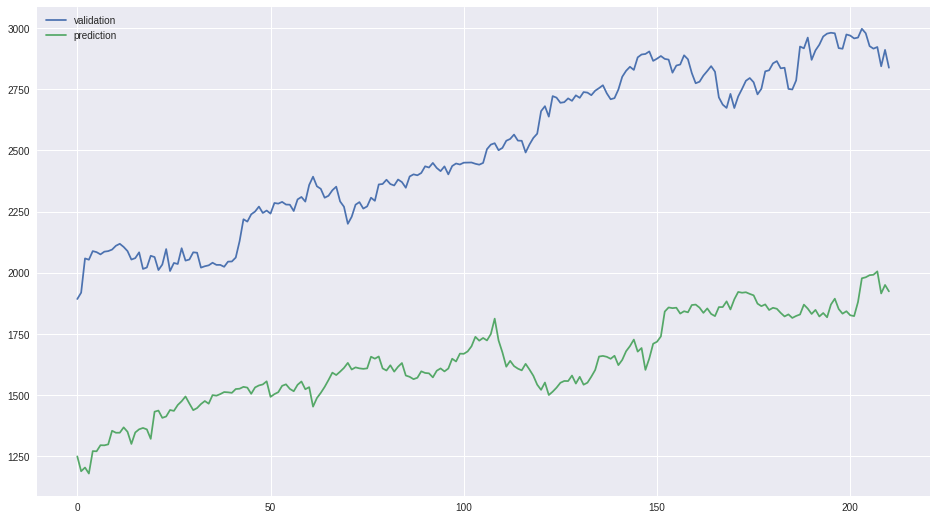

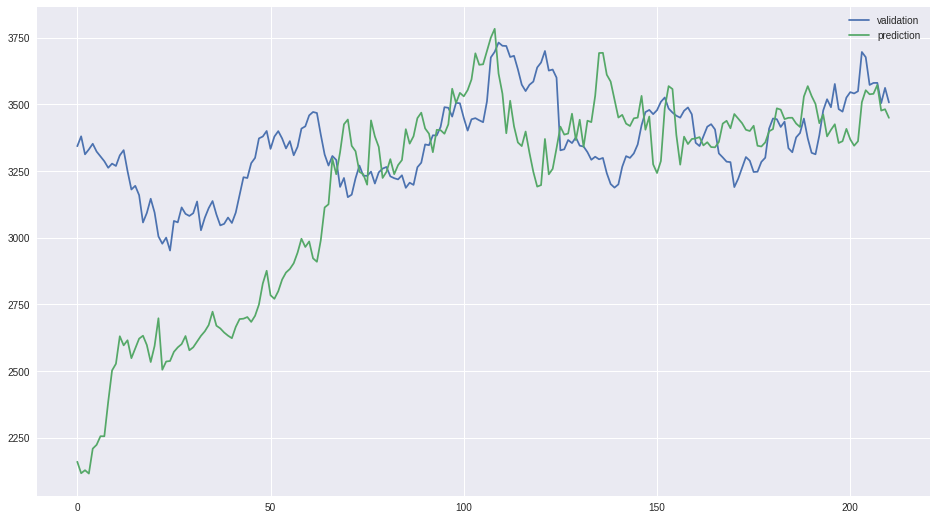

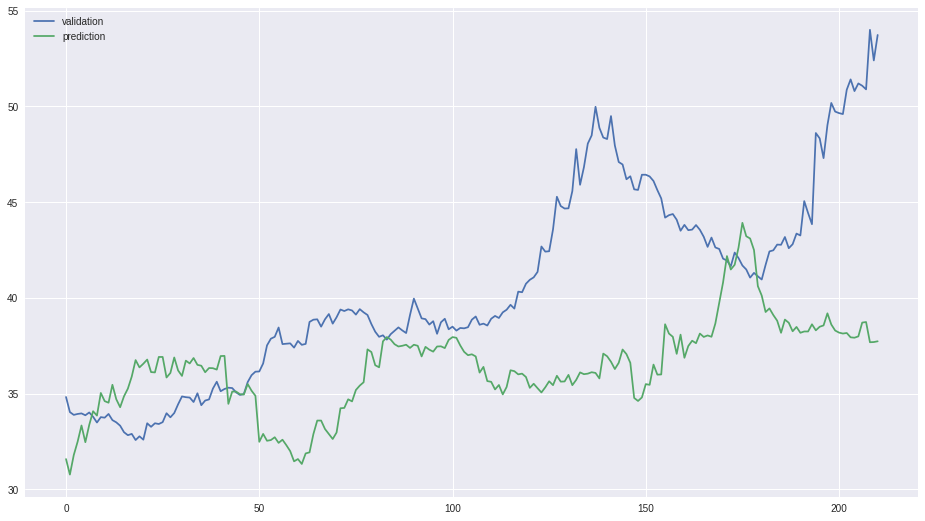

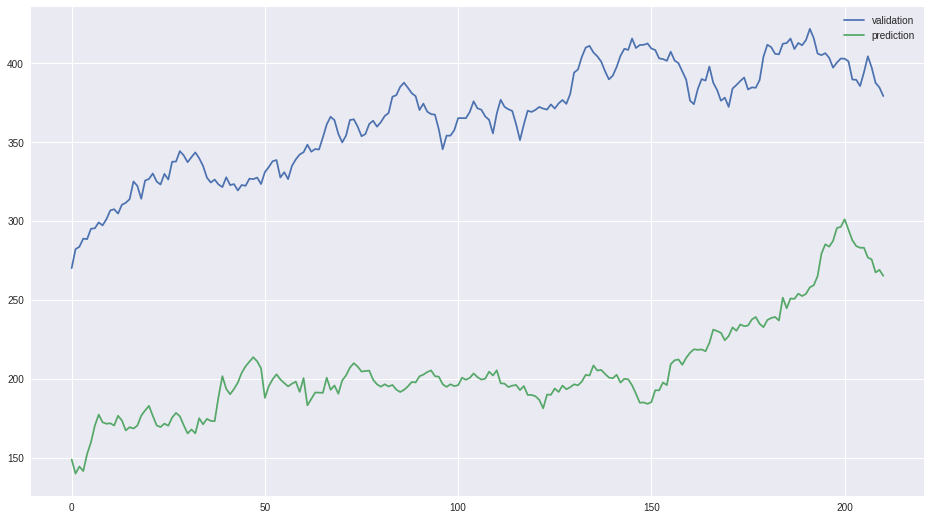

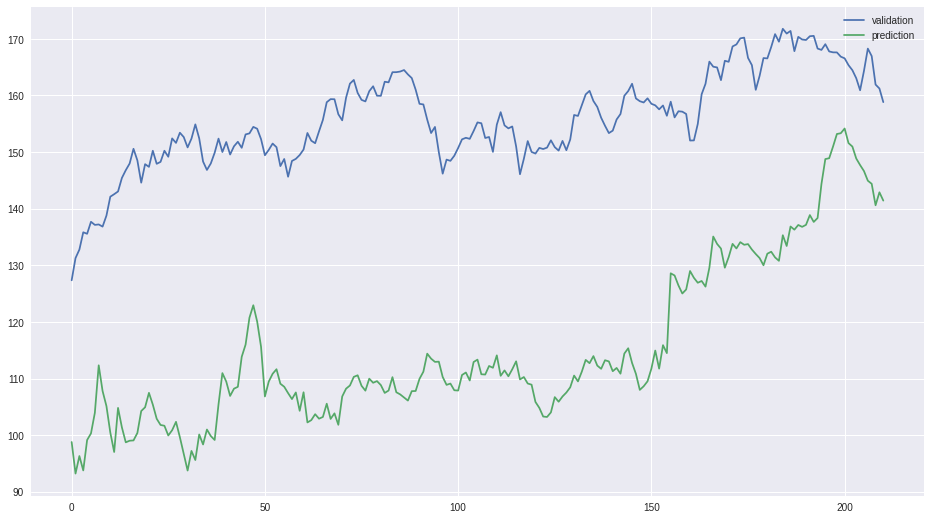

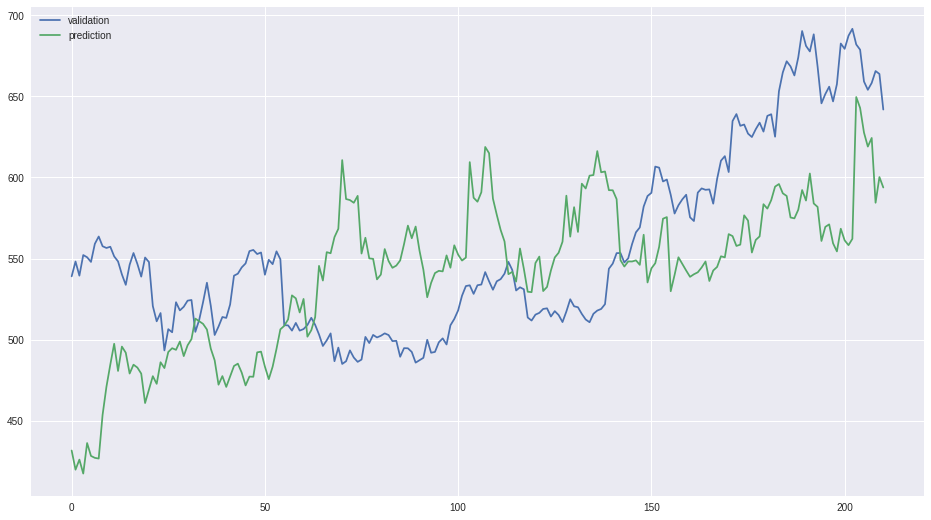

In [52]:
from tensorflow import keras
import sklearn.preprocessing as pre
import tensorflow as tf

#divido i dati in 80 mesi di training, 30 di test, 10 validazione. faccio le proporzioni
predicted = {}
for ticker in tickers:

    sc = pre.MinMaxScaler(feature_range=(200, 300))


    data = datasets[ticker]['Adj Close']
    s_data = sc.fit_transform(np.asarray(data).reshape(-1, 1))

    train = np.array(data.loc[start_date : '2018-07-30'])
    test = np.array(data.loc['2018-07-31':'2021-01-30'])
    validation = np.array(data.loc['2021-01-31':'2021-11-30'])

    window_size = output_size = validation.shape[0]

    train_inputs = np.asarray([s_data[i:i+window_size] for i in range(0, train.shape[0] - window_size)]).reshape((train.shape[0] - window_size, window_size, 1))
    train_outputs = np.asarray([s_data[i + window_size:i + window_size + output_size] for i in range(0, train_inputs.shape[0])]).reshape((train_inputs.shape[0], output_size, 1))

    test_inputs = np.asarray([s_data[i:i+window_size] for i in range(train.shape[0], train.shape[0] + test.shape[0] - window_size)]).reshape((test.shape[0] - window_size, window_size, 1))
    test_outputs = np.asarray([s_data[i + window_size : i + window_size + output_size] for i in range(train.shape[0], train.shape[0] + test_inputs.shape[0])]).reshape((test_inputs.shape[0], output_size, 1))


    model = tf.keras.Sequential([
        keras.layers.Conv1D(32, kernel_size = (1,), activation = 'relu'),
        keras.layers.Dense(250, activation = 'relu'),
        keras.layers.Dense(1)
    ])

    model.compile(
        optimizer = keras.optimizers.Adam(),
        loss='mse'
    )

    model.fit(train_inputs, train_outputs, epochs = 20, batch_size=10, validation_data = (test_inputs, test_outputs))

    predictions = sc.inverse_transform(model.predict(np.asarray(s_data[data.shape[0] - validation.shape[0] - window_size : data.shape[0] - validation.shape[0]]).reshape(1, window_size, 1))[0])
    predicted[ticker] = predictions

    plt.figure(figsize=(16, 9))
    plt.plot(np.asarray(validation), label = 'validation')
    plt.plot(predictions, label = 'prediction')
    plt.legend()

In [159]:
print(model.evaluate(np.asarray(data[data.shape[0] - validation.shape[0] - window_size : data.shape[0] - validation.shape[0]]).reshape(1, window_size, 1), np.asarray(validation).reshape(1, output_size, 1)))

predictions

1/1 [==============================] - 0s 91ms/step - loss: 25988.0098
25988.009765625


array([[548.85925],
       [532.4144 ],
       [541.05444],
       [529.0736 ],
       [555.2816 ],
       [544.2225 ],
       [542.55206],
       [541.9761 ],
       [579.416  ],
       [603.6512 ],
       [622.65924],
       [640.54395],
       [617.2016 ],
       [638.12476],
       [632.85443],
       [614.984  ],
       [622.5872 ],
       [620.12476],
       [614.92645],
       [589.6545 ],
       [601.2609 ],
       [612.7232 ],
       [606.128  ],
       [624.6752 ],
       [619.6784 ],
       [633.47363],
       [636.7424 ],
       [635.3311 ],
       [642.4879 ],
       [629.95996],
       [639.2479 ],
       [644.54724],
       [662.1728 ],
       [659.85443],
       [657.63684],
       [652.78406],
       [636.33923],
       [626.36005],
       [605.4081 ],
       [612.7808 ],
       [603.49286],
       [612.5504 ],
       [621.46405],
       [623.4656 ],
       [615.776  ],
       [604.7744 ],
       [612.3632 ],
       [612.20483],
       [633.1712 ],
       [633.79047],


### Alternativa con ARIMA (Scarsa)

In [36]:
from pmdarima import auto_arima

arima_model = auto_arima(np.concatenate([np.asarray(train).reshape(len(train)), np.asarray(test).reshape(len(test))]), start_p = 0, start_q = 0, max_p = 5, max_q = 5, max_d = 5, start_P=0, start_Q=0, start_D = 1, n_fits=100, seasonal = True, m = 12)
arima_model
plt.figure(figsize=(16, 9))
plt.plot(arima_model.predict(n_periods=validation.shape[0]))
plt.plot(np.asarray(validation))


NameError: name 'train' is not defined

## Capital Asset Pricing Model

In [51]:
## Scarico i dati di S&P 500
import pandas_datareader as web

betas = {}
sp500 = web.get_data_yahoo('^GSPC', start_date, end_date)
adj_close_df['Benchmark'] = sp500['Adj Close']

cov_mat = adj_close_df.resample('M').last().pct_change().dropna().cov()

for ticker in tickers:
    betas[ticker] = cov_mat[ticker]['Benchmark'] / cov_mat['Benchmark']['Benchmark']

print(betas)

#Fama-French
#Ottengo il dataframe pulito
factors = pd.read_csv('F-F_Research_Data_Factors.CSV', skiprows = 3)
factors = factors[factors.index < factors[factors.iloc[:, 0] == " Annual Factors: January-December "].index[0]]
factors.columns = ['Date', 'MKT', 'SMB', 'HML', 'RF']
factors['Date'] = pd.to_datetime(factors['Date'], format = '%Y%m').dt.strftime('%Y-%m')
factors = factors.set_index('Date')
factors = factors[start_date : end_date]

print(factors)

{'GOOGL': 1.0133211463991598, 'AMZN': 1.2221364180277146, 'PFE': 0.7559657449532845, 'GS': 1.5363367493697877, 'JPM': 1.2645108533132796, 'NFLX': 1.0919487385433977}
              MKT       SMB       HML        RF
Date                                           
2011-12      0.74     -0.60      1.61      0.00
2012-01      5.05      2.06     -0.94      0.00
2012-02      4.42     -1.86      0.43      0.00
2012-03      3.11     -0.66      1.12      0.00
2012-04     -0.85     -0.41     -0.77      0.00
...           ...       ...       ...       ...
2021-06      2.75      1.80     -7.76      0.00
2021-07      1.27     -3.96     -1.75      0.00
2021-08      2.90     -0.48     -0.13      0.00
2021-09     -4.37      0.80      5.09      0.00
2021-10      6.65     -2.28     -0.45      0.00

[119 rows x 4 columns]


In [52]:
import statsmodels.formula.api as smf

y = adj_close_df[tickers[0]].resample('M').last().pct_change().dropna()
y.index = y.index.strftime('%Y-%m')
y.name = 'RTN'

ff_data = factors.join(y)
for col in ff_data.columns:
    ff_data[col] = ff_data[col].astype('float')

ff_data['excess'] = ff_data['RTN'] - ff_data['RF']

print(ff_data)
ff_model = smf.ols(formula='excess ~ MKT + SMB + HML', data=ff_data).fit()
print(ff_model.summary())

          MKT   SMB   HML   RF       RTN    excess
Date                                              
2011-12  0.74 -0.60  1.61  0.0  0.077596  0.077596
2012-01  5.05  2.06 -0.94  0.0 -0.101858 -0.101858
2012-02  4.42 -1.86  0.43  0.0  0.065746  0.065746
2012-03  3.11 -0.66  1.12  0.0  0.037186  0.037186
2012-04 -0.85 -0.41 -0.77  0.0 -0.056749 -0.056749
...       ...   ...   ...  ...       ...       ...
2021-06  2.75  1.80 -7.76  0.0  0.036040  0.036040
2021-07  1.27 -3.96 -1.75  0.0  0.103506  0.103506
2021-08  2.90 -0.48 -0.13  0.0  0.074009  0.074009
2021-09 -4.37  0.80  5.09  0.0 -0.076169 -0.076169
2021-10  6.65 -2.28 -0.45  0.0  0.107499  0.107499

[119 rows x 6 columns]
                            OLS Regression Results                            
Dep. Variable:                 excess   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     12.

## Strategia di trading con backtesting

In [53]:
for ticker in tickers:
    print(ticker)
    datasets[ticker]['SMA20'] = datasets[ticker]['Adj Close'].rolling(20).mean()
    datasets[ticker]['SMA120'] = datasets[ticker]['Adj Close'].rolling(120).mean()
    datasets[ticker]['SMA252'] = datasets[ticker]['Adj Close'].rolling(252).mean()
    datasets[ticker]['EWM12'] = datasets[ticker]['Adj Close'].ewm(span = 12, adjust = False).mean()
    datasets[ticker]['EWM26'] = datasets[ticker]['Adj Close'].ewm(span = 26, adjust = False).mean()

    #plt.figure(figsize=(16, 9))
    #pl1 = plt.subplot2grid((2, 1), (0, 0), colspan = 1, title = ticker)
    #pl2 = plt.subplot2grid((6, 1), (5, 0), colspan = 1, sharex = pl1)
    #pl1.plot(datasets[ticker]['Adj Close'])
    #pl1.plot(datasets[ticker]['SMA120'])
    #pl1.plot(datasets[ticker]['SMA20'])
    #pl1.plot(datasets[ticker]['SMA252'])
    #pl1.plot(datasets[ticker]['EWM120'], label = 'EWM120')
    #pl1.plot(datasets[ticker]['EWM26'])
    #pl2.bar(datasets[ticker].index, datasets[ticker]['Volume'])
    #pl1.legend()

    #creo la strategia di tradind e calcolo il rendimento
    datasets[ticker]['Previous'] = datasets[ticker]['Adj Close'].shift(1)

    datasets[ticker]['Invested_SMA'] = [1 if datasets[ticker].loc[i, 'SMA20'] > datasets[ticker].loc[i, 'SMA120']
                                    else 0 for i in datasets[ticker].index]
    datasets[ticker]['Invested_EWM'] = [1 if datasets[ticker].loc[i, 'EWM12'] > datasets[ticker].loc[i, 'EWM26']
                                        else 0 for i in data.index]

    datasets[ticker]['Change'] = datasets[ticker]['Adj Close'] / datasets[ticker]['Previous']
    #print(datasets[ticker])

    sma_returns = np.cumprod(datasets[ticker]['Change'][datasets[ticker]['Invested_SMA'] == 1])
    ewm_returns = np.cumprod(datasets[ticker]['Change'][datasets[ticker]['Invested_EWM'] == 1])
    buy_and_hold = np.cumprod(datasets[ticker]['Change'])

    print(sma_returns, buy_and_hold, ewm_returns)

GOOGL
Date
2012-08-06    1.002323
2012-08-07    0.998768
2012-08-08    1.001403
2012-08-09    1.001590
2012-08-10    1.001045
                ...   
2021-11-23    4.353704
2021-11-24    4.363799
2021-11-26    4.246222
2021-11-29    4.346194
2021-11-30    4.237696
Name: Change, Length: 1905, dtype: float64 Date
2011-11-30         NaN
2011-12-01    1.023991
2011-12-02    1.034986
2011-12-05    1.043811
2011-12-06    1.040675
                ...   
2021-11-23    9.718962
2021-11-24    9.741496
2021-11-26    9.479025
2021-11-29    9.702196
2021-11-30    9.459991
Name: Change, Length: 2517, dtype: float64 Date
2011-12-01     1.023991
2011-12-02     1.034986
2011-12-05     1.043811
2011-12-06     1.040675
2011-12-07     1.040041
                ...    
2021-11-23    10.849145
2021-11-24    10.874300
2021-11-26    10.581307
2021-11-29    10.830430
2021-11-30    10.560060
Name: Change, Length: 1736, dtype: float64
AMZN
Date
2012-05-22    0.987254
2012-05-23    0.996195
2012-05-24    0.986842
2

## Ottimizzazione di portafoglio


In [64]:


expected_returns = {}

data = adj_close_df[:'2020-11-30'].pct_change()
mat = data.cov()
print(mat)

def find_portfolio(stocks, max_iterations):
    portfolio_returns = []
    portfolio_risks = []
    sharpe_ratios = []
    portfolio_weights = []

    rf_exp = 0.005
    
    for portfolio in range(max_iterations):
        weights = np.random.random_sample(len(stocks.columns))
        weights = np.round((weights / np.sum(weights)), 3)
        portfolio_weights.append(weights)
        c_returns = np.sum(stocks * weights)
        portfolio_returns.append(c_returns)
        portfolio_variance = np.dot(weights.T, np.dot(mat, weights))
        portfolio_standard_deviation = np.sqrt(portfolio_variance)
        portfolio_risks.append(portfolio_standard_deviation)
        sharpe_ratio = (c_returns - rf_exp) / portfolio_standard_deviation
        sharpe_ratios.append(sharpe_ratio)

    return  portfolio_weights, portfolio_returns, portfolio_risks, sharpe_ratios



## calcolo i ritorni attesi dal mese 109 in avanti basandomi sul forecasting
for ticker in tickers:
    expected_returns[ticker] = (predicted[ticker][predicted[ticker].shape[0] - 1] / datasets[ticker].loc['2020-11-30']['Adj Close']) - 1



expected_returns = pd.DataFrame(expected_returns)
find_portfolio(expected_returns, 100)




          GOOGL      AMZN       PFE        GS       JPM      NFLX
GOOGL  0.000254  0.000179  0.000078  0.000138  0.000122  0.000181
AMZN   0.000179  0.000379  0.000067  0.000124  0.000099  0.000248
PFE    0.000078  0.000067  0.000156  0.000093  0.000099  0.000064
GS     0.000138  0.000124  0.000093  0.000317  0.000257  0.000138
JPM    0.000122  0.000099  0.000099  0.000257  0.000300  0.000103
NFLX   0.000181  0.000248  0.000064  0.000138  0.000103  0.000958


([array([0.191, 0.015, 0.3  , 0.296, 0.039, 0.159]),
  array([0.056, 0.219, 0.236, 0.203, 0.213, 0.074]),
  array([0.343, 0.11 , 0.08 , 0.316, 0.056, 0.095]),
  array([0.172, 0.167, 0.131, 0.187, 0.278, 0.064]),
  array([0.152, 0.23 , 0.181, 0.062, 0.211, 0.164]),
  array([0.169, 0.054, 0.238, 0.197, 0.327, 0.015]),
  array([0.324, 0.098, 0.003, 0.112, 0.329, 0.135]),
  array([0.25 , 0.176, 0.194, 0.217, 0.06 , 0.103]),
  array([0.288, 0.185, 0.015, 0.242, 0.106, 0.165]),
  array([0.181, 0.009, 0.208, 0.033, 0.39 , 0.178]),
  array([0.196, 0.144, 0.28 , 0.132, 0.013, 0.235]),
  array([0.24 , 0.225, 0.077, 0.157, 0.086, 0.215]),
  array([0.294, 0.221, 0.087, 0.203, 0.023, 0.172]),
  array([0.205, 0.195, 0.204, 0.173, 0.182, 0.042]),
  array([0.104, 0.061, 0.003, 0.267, 0.31 , 0.255]),
  array([0.313, 0.253, 0.062, 0.159, 0.05 , 0.163]),
  array([0.007, 0.525, 0.147, 0.141, 0.065, 0.115]),
  array([0.088, 0.22 , 0.21 , 0.211, 0.115, 0.155]),
  array([0.066, 0.25 , 0.114, 0.235, 0.142, 0.

In [34]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime
import pandas as pd

start_date = '2009-9-29'
end_date = '2021-12-09'
#end_date = datetime.today()
future_days = 211
ticker = 'AMZN'
df = datasets[ticker][:'2021-01-30']
df[str(future_days) + '_Day_Price_Forecast'] = df[['Close']].shift(-future_days)
X = np.array(df[['Close']])
X = X[:df.shape[0] - future_days]
y = np.array(df[str(future_days) + '_Day_Price_Forecast'])
y = y[:-future_days]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=30/110)


gamma = 0.00000001

svr_rbf_confidence = 0
svr_rbf = SVR(kernel='linear', C=1000, gamma=gamma)
svr_rbf.fit(x_train, y_train)
x_f = svr_rbf.predict(df[['Close']].iloc[df.shape[0] - future_days : df.shape[0]])
#svm_prediction = np.append(df['Close'].iloc[df.shape[0] - x_test.shape[0]: df.shape[0]], x_f)
svr_rbf_confidence = svr_rbf.score(x_test, y_test)

#minimo = svm_prediction.min()
#massimo = svm_prediction.max()

print(svr_rbf_confidence)

#full_pred = svm_prediction

<ipython-input-34-67e75e2a7bfa>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[str(future_days) + '_Day_Price_Forecast'] = df[['Close']].shift(-future_days)


0.8448600050256901


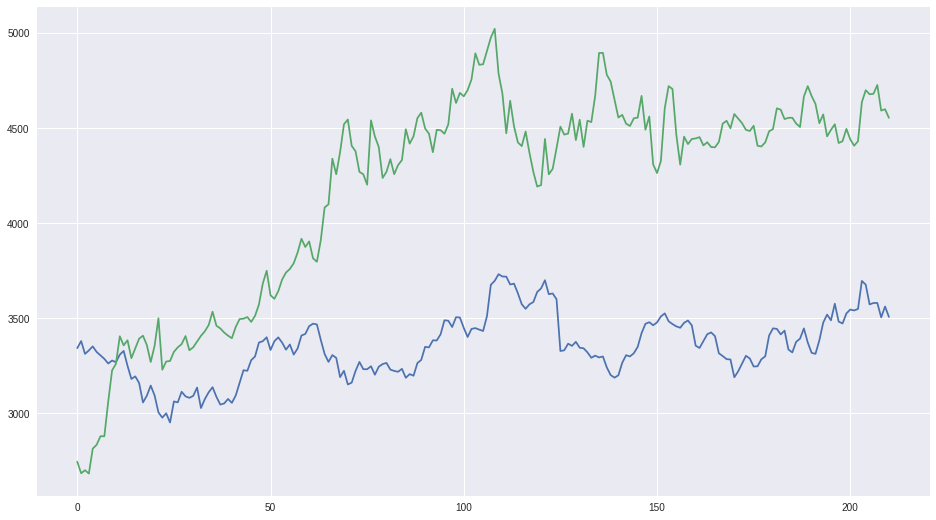

In [35]:
plt.figure(figsize=(16, 9))
plt.plot(np.asarray(datasets[ticker]['Adj Close']['2021-01-31':]))
plt.plot(x_f)